In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:

df = pd.read_excel(r"C:\Users\Risav\Downloads\1730285881-Airbnb_Open_Data.xlsx")

In [10]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

In [12]:
df.duplicated().value_counts()

False    102058
True        541
Name: count, dtype: int64

In [13]:
df['neighbourhood group'] = df['neighbourhood group'].replace('manhatan', 'Manhattan')


In [14]:
##what are the different types of properties in the dataset?
property_types = df['room type'].value_counts()
property_types


room type
Entire home/apt    53701
Private room       46556
Shared room         2226
Hotel room           116
Name: count, dtype: int64

<Axes: title={'center': 'Room Type Distribution'}, xlabel='room type'>

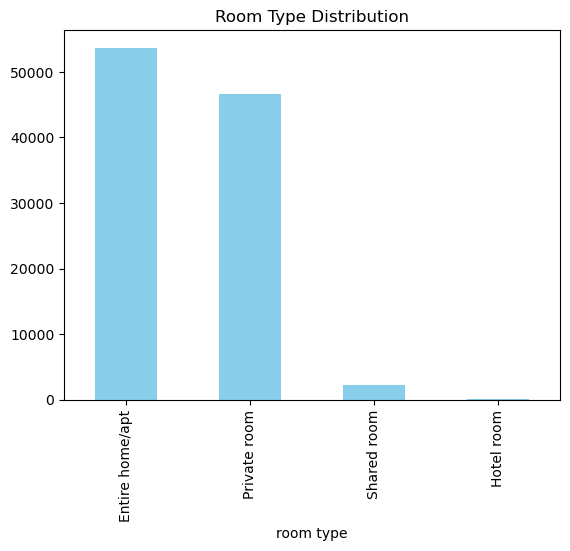

In [15]:
# Plot
df['room type'].value_counts().plot(kind='bar', color='skyblue', title='Room Type Distribution')

In [16]:
# Which neighbourhood group has the highest no. of listings?

hood_group = df['neighbourhood group'].value_counts().to_frame()
hood_group

,count
neighbourhood group,
Manhattan,43793
Brooklyn,41842
Queens,13267
Bronx,2712
Staten Island,955
brookln,1


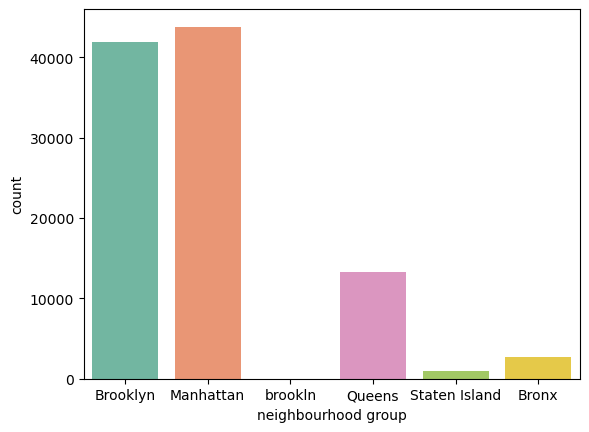

In [17]:
#plot
sns.countplot(x="neighbourhood group", hue="neighbourhood group", data=df, palette="Set2", legend=False)
plt.show()

In [18]:
## Which neighbourhoods group have the highest average prices for airbnb listing?
avg_price = df.groupby('neighbourhood group')['price'].mean().sort_values(ascending=False).to_frame()
avg_price


,price
neighbourhood group,
Queens,630.207647
Bronx,627.766359
Brooklyn,626.562193
Staten Island,624.490546
Manhattan,622.436508
brookln,580.000000


<Axes: title={'center': 'Average Airbnb Prices by Neighbourhood Group'}, xlabel='neighbourhood group'>

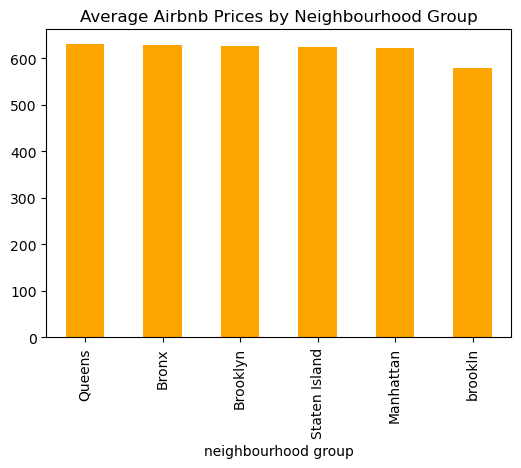

In [19]:
avg_price.plot(kind='bar', color='orange', legend=False, title='Average Airbnb Prices by Neighbourhood Group', figsize=(6,4))


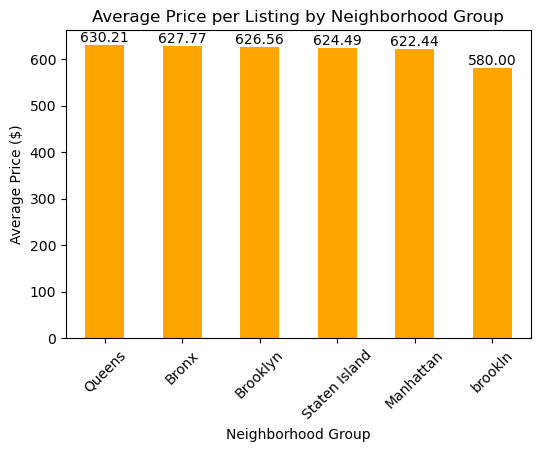

In [20]:
avg_price = df.groupby('neighbourhood group')['price'].mean().sort_values(ascending=False)

# Plot the bar chart
ax = avg_price.plot(kind='bar', color='orange', figsize=(6,4), title='Average Price per Listing by Neighborhood Group')

# Add numbers on top of bars
for i, v in enumerate(avg_price):
    ax.text(i, v, f'{v:.2f}', ha='center', va='bottom')

# Labels
ax.set_xlabel('Neighborhood Group')
ax.set_ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Avg price for properties in each construction year')

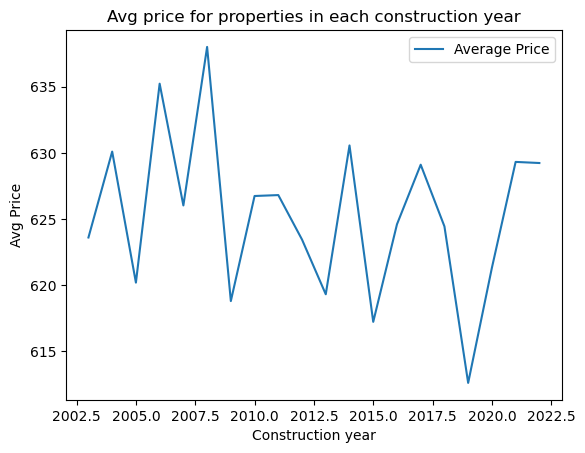

In [21]:
## Is there a relationship between the construction year of a property and price?

df.groupby('Construction year')['price'].mean().to_frame('Average Price').plot()
plt.ylabel('Avg Price')
plt.title("Avg price for properties in each construction year")


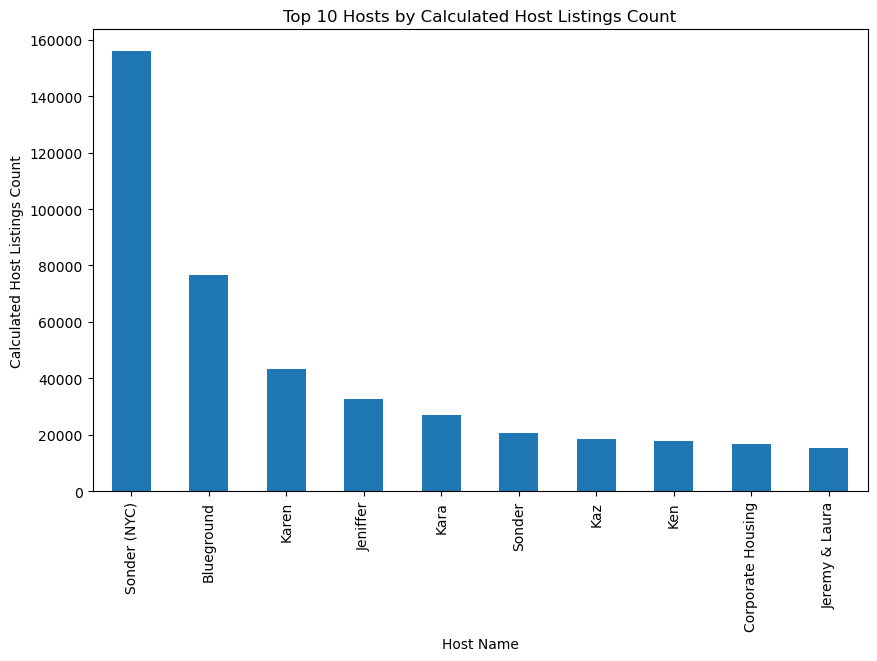

In [22]:
## Who are the top 10 hosts by calculated host listing count
top_hosts = df.groupby('host name')['calculated host listings count'].sum().nlargest(10)
# Plot
top_hosts.plot(kind='bar', figsize=(10,6))
plt.xlabel('Host Name')
plt.ylabel('Calculated Host Listings Count')
plt.title('Top 10 Hosts by Calculated Host Listings Count')
plt.show()

In [23]:
## Are hosts with verified identities more likely to get positive reviews?
review = df.groupby("host_identity_verified")["review rate number"].mean().sort_values(ascending= False).to_frame()
review

,review rate number
host_identity_verified,
verified,3.286684
unconfirmed,3.271767


In [24]:
## Is there a correlation between price of a listing and it' service fee?

df['price'].corr(df['service fee'])

0.9999908755543334

<Axes: xlabel='price', ylabel='service fee'>

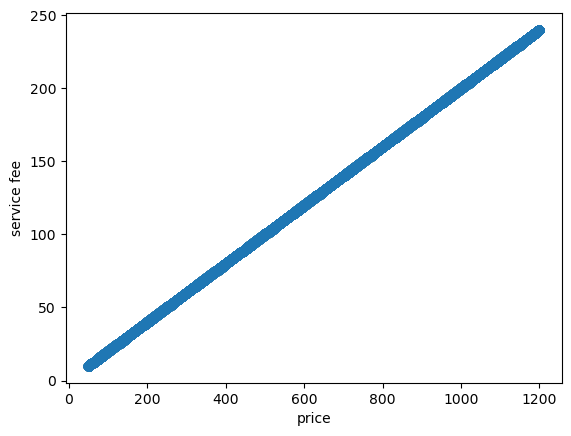

In [25]:
sns.regplot(df, x='price',y='service fee')

In [47]:
## What is the average review rate no.(eg stars) for listings and does it vary based on neighbourhood group and room type?
ARRN = df.groupby(['neighbourhood group','room type'])['review rate number'].mean().to_frame()
ARRN

review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.346457
                    Private room               3.329706
                    Shared room                3.264957
Brooklyn            Entire home/apt            3.250378
                    Hotel room                 3.750000
                    Private room               3.264465
                    Shared room                3.336983
Manhattan           Entire home/apt            3.275807
                    Hotel room                 3.500000
                    Private room               3.277559
                    Shared room                3.257459
Queens              Entire home/apt            3.349154
                    Hotel room                 3.750000
                    Private room               3.315585
                    Shared room                3.377778
Staten Island       Entire home/apt            3.329087
                    Private room               3.479482
                    Shared room                3.533333
brookln             Private room               4.000000

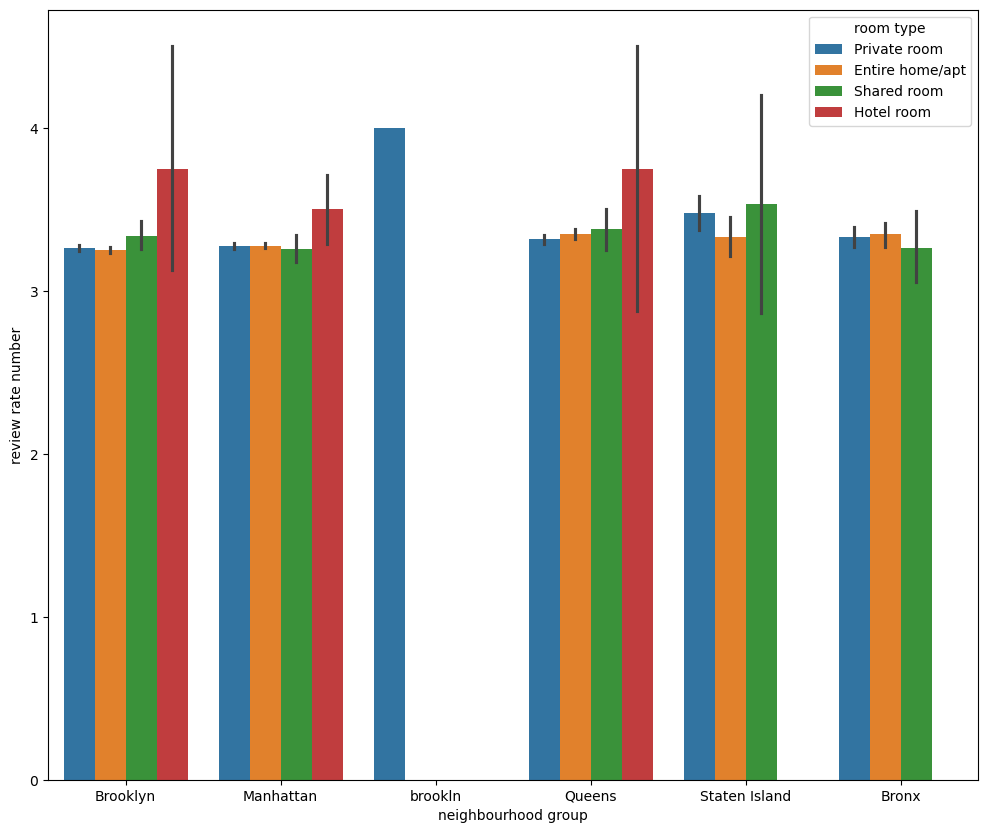

In [52]:
plt.figure(figsize=[12,10])
sns.barplot(data= df, x = 'neighbourhood group', y= 'review rate number', hue = 'room type');


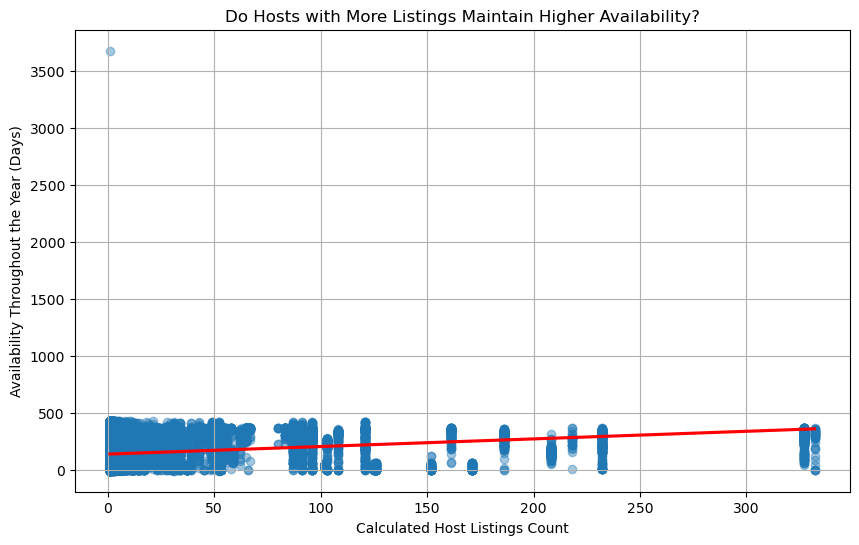

In [28]:
## Are hosts with a higher calculated host listings count more likely to maintain a higher availability throughout the year?
plt.figure(figsize=(10,6))
sns.regplot(data=df,
    x='calculated host listings count',
    y='availability 365',
    scatter_kws={'alpha':0.4},
    line_kws={'color':'red'}
)
plt.title("Do Hosts with More Listings Maintain Higher Availability?")
plt.xlabel("Calculated Host Listings Count")
plt.ylabel("Availability Throughout the Year (Days)")
plt.grid(True)
plt.show()

In [30]:
df=['calculated host listings count'].corr(df['availability 365'])

AttributeError: 'list' object has no attribute 'corr'